In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [2]:
train_df =  pd.read_csv('../Dataset/cleaned_customer_churn_dataset_training.csv')
test_df =  pd.read_csv('../Dataset/cleaned_customer_churn_dataset_testing.csv')
print(train_df)
print("*" *100)
print(test_df)

        CustomerID   Age  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0    39.0             14.0            5.0   
1              3.0  65.0    49.0              1.0           10.0   
2              4.0  55.0    14.0              4.0            6.0   
3              5.0  58.0    38.0             21.0            7.0   
4              6.0  23.0    32.0             20.0            5.0   
...            ...   ...     ...              ...            ...   
440828    449995.0  42.0    54.0             15.0            1.0   
440829    449996.0  25.0     8.0             13.0            1.0   
440830    449997.0  26.0    35.0             27.0            1.0   
440831    449998.0  28.0    55.0             14.0            2.0   
440832    449999.0  31.0    48.0             20.0            1.0   

        Payment Delay  Subscription Type  Contract Length  Total Spend  \
0                  10                  2                1       932.00   
1                  29              

In [3]:
X_train = train_df.drop(['CustomerID', 'Churn'], axis=1)
y_train = train_df['Churn']

X_test = test_df.drop(['CustomerID', 'Churn'], axis=1)
y_test = test_df['Churn']

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

logistic_y_pred = logistic_regression.predict(X_test)

print("Accuracy:", accuracy_score(y_test, logistic_y_pred))
print("Precision:", precision_score(y_test, logistic_y_pred))
print("Recall:", recall_score(y_test, logistic_y_pred))
print("F1 Score:", f1_score(y_test, logistic_y_pred))

Accuracy: 0.579395408084009
Precision: 0.5309864519288319
Recall: 0.9601219952120159
F1 Score: 0.6838024056989372


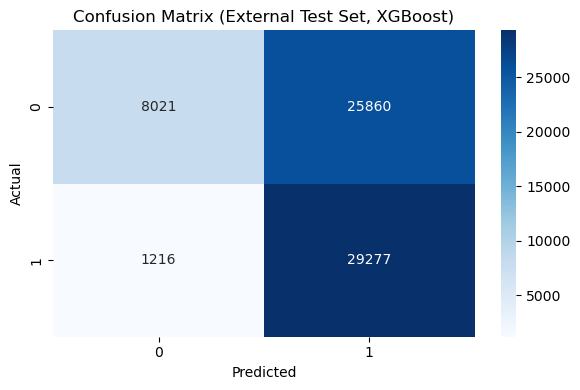

In [4]:
logistic_confusion_matrix = confusion_matrix(y_test, logistic_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (External Test Set, XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()